# Sleep Health

🔘 **Problem:** Uyku kalitesi, sağlıklı bir yaşam tarzının ana unsurlarından biridir. Hayatımızın yaklaşık üçte birini uyuyarak geçiriyoruz — ya da en azından öyle yapmamız gerekiyor. Uykusuzluk, ABD'deki en yaygın uyku bozukluğu olup, genel nüfusun yaklaşık üçte birini etkiliyor. Ulusal Sağlık Enstitüleri'ne göre, bu durum uyku bozukluklarının başında geliyor. İşte uyku hakkında bilmeniz gerekenler.

🔘 **Problemi Çözme:** Yapay zekâdaki gelişmelerle birlikte, makine öğrenimi modelleri kullanılarak bir eğitim veri seti üzerinde eğitilip, test veri seti üzerinde test edildikten sonra bir sınıflandırıcı, girilecek verilere dayanarak bir kişinin uyku bozukluğu olup olmadığını tahmin edebilir.

Bu tanıma dayanarak uyku kalitesi tahmini için bir model geliştirebiliriz.

**Person ID**: Her birey için bir kimlik numarası.
    
**Gender**: Kişinin cinsiyeti (Erkek/Kadın).
    
**Age**: Kişinin yaşı (yıl olarak).
    
**Occupation**: Kişinin mesleği ya da profesyonel iş alanı.
    
**Sleep Duration (hours)**: Kişinin günlük uyuduğu saat sayısı.
    
**Quality of Sleep (scale**: 1-10):  Kişinin uykusunun kalitesine verdiği öznel bir değerlendirme, 1'den 10'a kadar bir skalada.
    
**Physical Activity Level (minutes/day)**: Kişinin günlük olarak yaptığı fiziksel aktivitenin dakika cinsinden süresi.
    
**Stress Level (scale: 1-10)**: Kişinin yaşadığı stres seviyesine verdiği öznel bir değerlendirme, 1'den 10'a kadar bir skalada.
    
**BMI Category**: Kişinin BKİ kategorisi (Örneğin: Zayıf, Normal, Fazla Kilolu).
    
**Blood Pressure (systolic/diastolic)**: Kişinin kan basıncı ölçümü, sistolik basınç/diyastolik basınç olarak belirtilir.
    
**Heart Rate (bpm)**: Kişinin dinlenme halindeki kalp atış hızı (dakikadaki atım sayısı).
    
**Daily Steps**: Kişinin günlük attığı adım sayısı.
    
**Sleep Disorder**: Kişide uyku bozukluğu olup olmadığını belirtir (Hiçbiri, Uykusuzluk, Uyku Apnesi).

In [1]:
!pip install plotly

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff

from sklearn.model_selection import train_test_split

import warnings 
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("C:/Users/ASUS/Desktop/Sleep Health and Lifestyle/Sleep_health_and_lifestyle_dataset.csv")

In [4]:
data.head(15)

Person ID Gender  Age            Occupation  Sleep Duration  \
0           1   Male   27     Software Engineer             6.1   
1           2   Male   28                Doctor             6.2   
2           3   Male   28                Doctor             6.2   
3           4   Male   28  Sales Representative             5.9   
4           5   Male   28  Sales Representative             5.9   
5           6   Male   28     Software Engineer             5.9   
6           7   Male   29               Teacher             6.3   
7           8   Male   29                Doctor             7.8   
8           9   Male   29                Doctor             7.8   
9          10   Male   29                Doctor             7.8   
10         11   Male   29                Doctor             6.1   
11         12   Male   29                Doctor             7.8   
12         13   Male   29                Doctor             6.1   
13         14   Male   29                Doctor             6.0   
14         15   Male   29                Doctor             6.0   

    Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                  6                       42             6   Overweight   
1                  6                       60             8       Normal   
2                  6                       60             8       Normal   
3                  4                       30             8        Obese   
4                  4                       30             8        Obese   
5                  4                       30             8        Obese   
6                  6                       40             7        Obese   
7                  7                       75             6       Normal   
8                  7                       75             6       Normal   
9                  7                       75             6       Normal   
10                 6                       30             8       Normal   
11                 7                       75             6       Normal   
12                 6                       30             8       Normal   
13                 6                       30             8       Normal   
14                 6                       30             8       Normal   

   Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0          126/83          77         4200            NaN  
1          125/80          75        10000            NaN  
2          125/80          75        10000            NaN  
3          140/90          85         3000    Sleep Apnea  
4          140/90          85         3000    Sleep Apnea  
5          140/90          85         3000       Insomnia  
6          140/90          82         3500       Insomnia  
7          120/80          70         8000            NaN  
8          120/80          70         8000            NaN  
9          120/80          70         8000            NaN  
10         120/80          70         8000            NaN  
11         120/80          70         8000            NaN  
12         120/80          70         8000            NaN  
13         120/80          70         8000            NaN  
14         120/80          70         8000            NaN

In [5]:
print("Veri seti boyutu :", data.shape)

Veri seti boyutu : (374, 13)


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [7]:
data.isnull().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [8]:
data.describe().T

count         mean          std     min      25%  \
Person ID                374.0   187.500000   108.108742     1.0    94.25   
Age                      374.0    42.184492     8.673133    27.0    35.25   
Sleep Duration           374.0     7.132086     0.795657     5.8     6.40   
Quality of Sleep         374.0     7.312834     1.196956     4.0     6.00   
Physical Activity Level  374.0    59.171123    20.830804    30.0    45.00   
Stress Level             374.0     5.385027     1.774526     3.0     4.00   
Heart Rate               374.0    70.165775     4.135676    65.0    68.00   
Daily Steps              374.0  6816.844920  1617.915679  3000.0  5600.00   

                            50%      75%      max  
Person ID                 187.5   280.75    374.0  
Age                        43.0    50.00     59.0  
Sleep Duration              7.2     7.80      8.5  
Quality of Sleep            7.0     8.00      9.0  
Physical Activity Level    60.0    75.00     90.0  
Stress Level                5.0     7.00      8.0  
Heart Rate                 70.0    72.00     86.0  
Daily Steps              7000.0  8000.00  10000.0

In [9]:
data.describe(include=[object])

Gender Occupation BMI Category Blood Pressure Sleep Disorder
count     374        374          374            374            155
unique      2         11            4             25              2
top      Male      Nurse       Normal         130/85    Sleep Apnea
freq      189         73          195             99             78

count : Toplam veri

unique : Benzersiz veri. (Kadın/Erkek)

top : En sık eden değer

freq : En sık eden değerin görülme sayısı    


In [10]:
columns_name = data.columns
columns_name

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [11]:
# # Benzersiz değerlerin sayısını al
number_of_values = data.nunique()

In [12]:
number_of_values

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               2
dtype: int64

In [13]:
import matplotlib.pyplot as plt

# Kullanılabilir stiller - Kütüphanenin desteklediği stiller
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


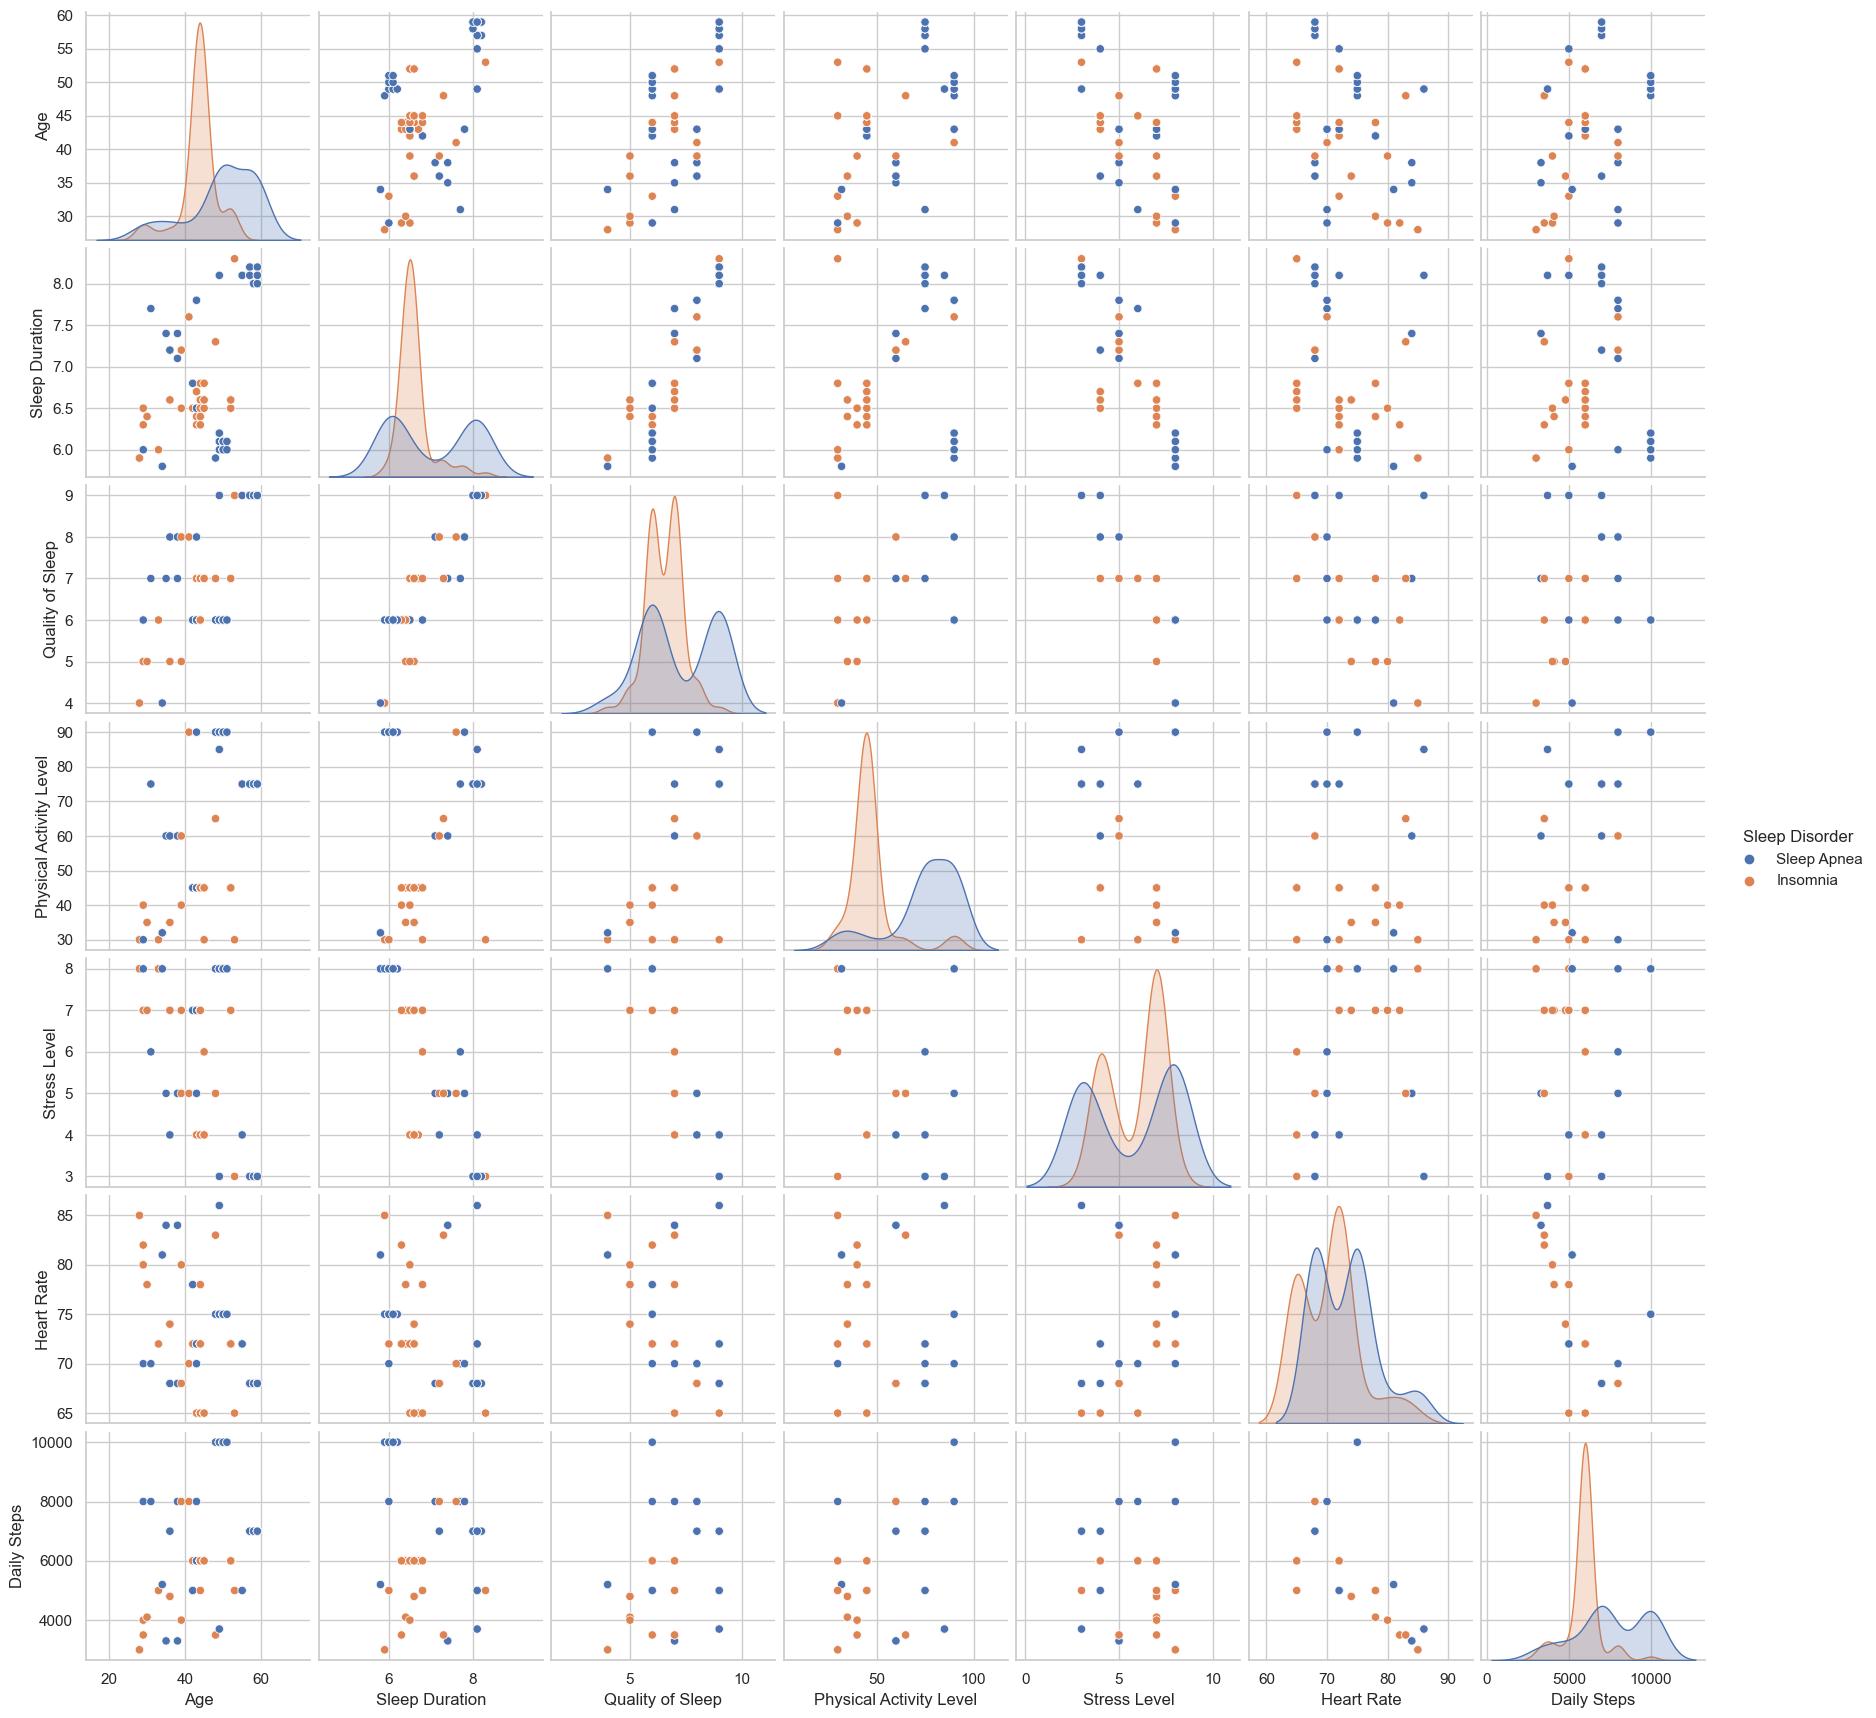

In [14]:
# Seaborn'ün kendi stilini kullan
sns.set(style='whitegrid')  # 'whitegrid', 'darkgrid', 'white', 'dark' gibi seçenekler

# Pairplot oluştur
sns.pairplot(data=data.drop('Person ID', axis=1), hue='Sleep Disorder')

# Grafiği göster
plt.show()

Bu kod, seaborn kütüphanesi kullanarak veri setindeki değişkenler arasındaki ilişkileri gösteren bir pairplot oluşturur. Person ID sütunu hariç tutularak yalnızca diğer sütunlarla analiz yapılır. Sleep Disorder sütununa göre renkler kullanılarak farklı uyku bozukluğu kategorileri arasında bir ayrım yapılır. Sonuçta, verilerin tüm değişkenleri arasındaki ilişkileri görsel olarak inceleyebilirsiniz.

## Uykusuzluk Problemi Yaşayan ve Yaşamayan Kişilerin Yüzdesi

In [15]:
# Sleep Disorder -> Kişide uyku bozukluğu olup olmadığını belirtir.

classes = data["Sleep Disorder"].unique()

In [16]:
print(f"Sınıflandırma Çıktıları : {classes}")

Sınıflandırma Çıktıları : [nan 'Sleep Apnea' 'Insomnia']


In [17]:
data["Sleep Disorder"].value_counts() # Benzersiz değer kaç kez var?

Sleep Disorder
Sleep Apnea    78
Insomnia       77
Name: count, dtype: int64

In [18]:
Gender = data["Gender"].unique()

In [19]:
Gender

array(['Male', 'Female'], dtype=object)

In [20]:
data.groupby("Sleep Disorder")["Gender"].value_counts()

Sleep Disorder  Gender
Insomnia        Male      41
                Female    36
Sleep Apnea     Female    67
                Male      11
Name: count, dtype: int64

In [21]:
# Sleep Disorder  Gender
# Insomnia        Male       41
#                 Female     36
# None            Male      137
#                 Female     82
# Sleep Apnea     Female     67
#                 Male       11
# Name: Gender, dtype: int64

- **Normal** kategorisinde erkeklerin kadınlardan daha fazla olduğu açıkça görülüyor.

- **Insomnia** (uykusuzluk) yaşayan erkeklerin kadınlardan daha fazla olduğu açıkça görülüyor.

- **Sleep Apnea** (uyku apnesi) yaşayan kadınların erkeklerden daha fazla olduğu açıkça görülüyor.

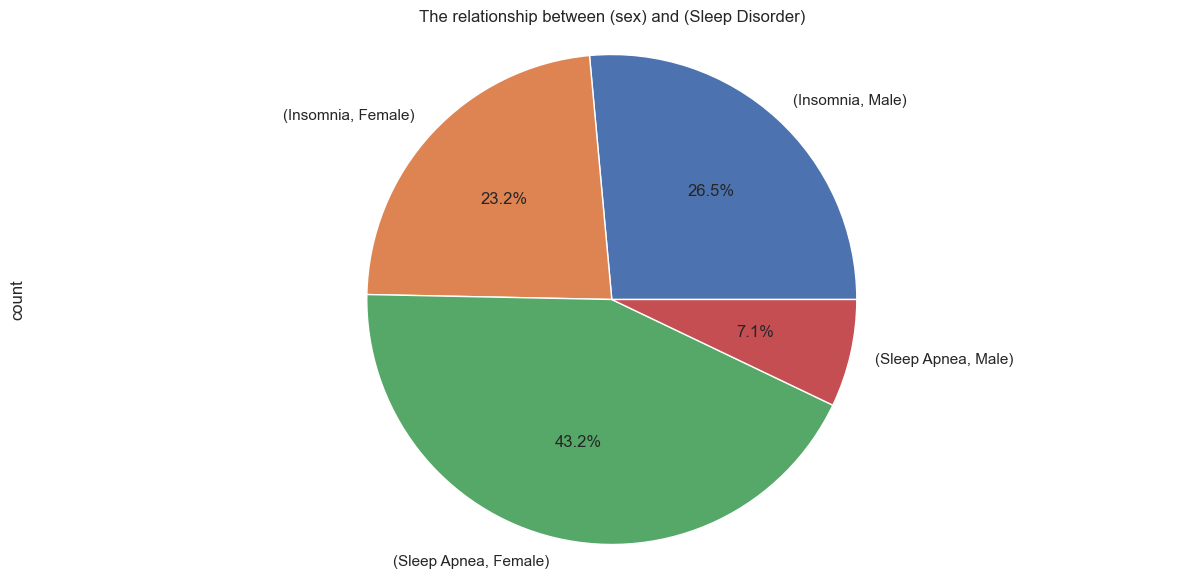

In [22]:
import matplotlib.pyplot as plt

# Pasta grafiği oluştur
data.groupby('Sleep Disorder')['Gender'].value_counts().plot.pie(
    autopct='%1.1f%%',  # Yüzde değerlerini göster
    figsize=(15, 7)     # Grafik boyutu
)

# Başlık ekle
plt.title('The relationship between (sex) and (Sleep Disorder)')

# Eksen oranını eşit yap
plt.axis('equal')

# Grafiği göster
plt.show()

In [23]:
jobs = data["Occupation"].unique()

In [24]:
print('Mevcut İş Türleri :',jobs)

Mevcut İş Türleri : ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']


In [25]:
data.groupby("Sleep Disorder")["Occupation"].value_counts()

Sleep Disorder  Occupation          
Insomnia        Salesperson             29
                Teacher                 27
                Accountant               7
                Engineer                 5
                Doctor                   3
                Nurse                    3
                Lawyer                   2
                Software Engineer        1
Sleep Apnea     Nurse                   61
                Doctor                   4
                Teacher                  4
                Lawyer                   3
                Sales Representative     2
                Scientist                2
                Engineer                 1
                Salesperson              1
Name: count, dtype: int64

In [26]:
# Sleep Disorder  Occupation          
# Insomnia        Salesperson             29
#               Teacher                 27
#                 Accountant               7
#                 Engineer                 5
#                 Doctor                   3
#                 Nurse                    3
#                 Lawyer                   2
#                 Software Engineer        1
# None            Doctor                  64
#                 Engineer                57
#                 Lawyer                  42
#                 Accountant              30
#                 Nurse                    9
#                 Teacher                  9
#                 Software Engineer        3
#                 Salesperson              2
#                 Scientist                2
#                 Manager                  1
# Sleep Apnea     Nurse                   61
#                 Doctor                   4
#                 Teacher                  4
#                 Lawyer                   3
#                 Sales Representative     2
#                 Scientist                2
#                 Engineer                 1
#                 Salesperson              1
# Name: Occupation, dtype: int64

In [27]:
data.pivot_table(index='Quality of Sleep',
                 columns='Sleep Disorder',
                 values='Sleep Duration',
                 aggfunc='mean').style.background_gradient(cmap='BuPu')

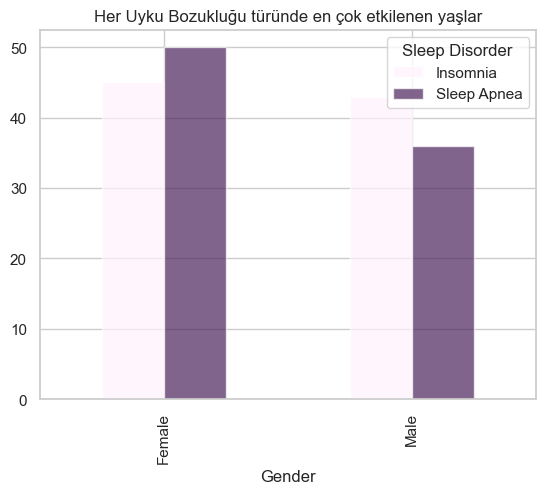

In [28]:
data.pivot_table(index = "Gender",
                 columns = "Sleep Disorder",
                 values = "Age", 
                 aggfunc = "median").plot(kind="bar",
                                          color={'#FFF3FD',
                                                 '#4A235A',
                                                 'pink'},
                                          title="Her Uyku Bozukluğu türünde en çok etkilenen yaşlar",
                                          label="Age", alpha=.7)
                                          
plt.show()                                          

Verdiğiniz kod, bir pivot tablosu oluşturur ve bu tabloyu bir çubuk grafiği olarak görselleştirir. İşte kodun detaylı açıklaması:

```python
import matplotlib.pyplot as plt

# Pivot tablo oluşturuluyor
pivot_table = data.pivot_table(
    index="Gender",                  # Satırda kullanılacak kategori: Cinsiyet
    columns="Sleep Disorder",        # Sütunda kullanılacak kategori: Uyku Bozukluğu
    values="Age",                    # Her hücrede gösterilecek değer: Yaş
    aggfunc="median"                 # Hesaplanacak toplulaştırma fonksiyonu: Medyan
)

# Pivot tablosu çubuk grafiği olarak görselleştiriliyor
pivot_table.plot(
    kind="bar",                      # Grafik türü: Çubuk grafiği
    color=['#FFF3FD', '#4A235A', 'pink'], # Her kategori için renkler
    title="Her Uyku Bozukluğu türünde en çok etkilenen yaşlar", # Grafik başlığı
    ylabel="Age",                    # Y ekseninin etiketi: Yaş
    alpha=0.7                        # Çubukların şeffaflık seviyesi
)

# Grafik gösteriliyor
plt.show()
```

### Açıklama:

1. **`data.pivot_table` Fonksiyonu:**
   - **`index="Gender"`**: Pivot tablosunda satırları oluşturacak kategori. Burada cinsiyet (`Gender`) kullanılır.
   - **`columns="Sleep Disorder"`**: Pivot tablosunda sütunları oluşturacak kategori. Burada uyku bozuklukları (`Sleep Disorder`) kullanılır.
   - **`values="Age"`**: Her hücrede gösterilecek veri türü. Burada yaş (`Age`) kullanılır.
   - **`aggfunc="median"`**: Yaş verileri için kullanılacak toplulaştırma fonksiyonu. Bu, her kombinasyon için yaşın medyanını hesaplar.

2. **`pivot_table.plot` Fonksiyonu:**
   - **`kind="bar"`**: Grafik türü olarak çubuk grafiği seçilir.
   - **`color=['#FFF3FD', '#4A235A', 'pink']`**: Çubukların renkleri. Her uyku bozukluğu türü için farklı bir renk atanır.
   - **`title="Her Uyku Bozukluğu türünde en çok etkilenen yaşlar"`**: Grafiğin başlığı.
   - **`ylabel="Age"`**: Y ekseninin etiketi, yani yaş (`Age`).
   - **`alpha=0.7`**: Çubukların şeffaflık seviyesi. 1 tam opaklık, 0 tamamen şeffaflık anlamına gelir.

3. **`plt.show()`**: Grafiği ekranda gösterir.

Bu kod, cinsiyete ve uyku bozukluğu türüne göre yaş medyanlarını gösteren bir çubuk grafiği oluşturur. Her uyku bozukluğu türü için farklı renkler kullanılır ve grafik başlığı, yaşların etkisini anlatan bir açıklama içerir.

In [29]:
fig = px.ecdf(data,x = 'Age',
             color = 'Sleep Disorder',
             color_discrete_sequence=['white','#4A235A','#C39BD3'])

fig.update_layout(title='<b>The effect of ages on sleep </b>..',
                 title_font={'size':25},
                 paper_bgcolor='#EBDEF0',
                 plot_bgcolor='#EBDEF0')


fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()

In [30]:
fig=px.histogram(data,x='Sleep Disorder',y='Sleep Duration',
                 color='Sleep Disorder',color_discrete_sequence=['white','#4A235A','#C39BD3'],
                 text_auto=True)



fig.update_layout(title='<b>The effect of Sleep Duration on Sleep Disorder</b> ..',
                  titlefont={'size': 24,'family': 'Serif'},
                  showlegend=True, 
                  paper_bgcolor='#EBDEF0',
                  plot_bgcolor='#EBDEF0')



fig.update_yaxes(showgrid=False)




fig.show()

In [31]:
fig=px.scatter_3d(data,x='BMI Category',y='Blood Pressure',z='Heart Rate',
                  color='Sleep Disorder',width=1000,height=900,
                  color_discrete_sequence=['white','#4A235A','#C39BD3'])


fig.update_layout(title='<b>The relationship between (BMI Category , Blood Pressure and Heart Rate) and their effect on  Sleep Disorder</b> ..',
                  titlefont={'size': 20,'family': 'Serif'},
                  showlegend=True)



fig.show()

In [32]:
data.pivot_table(index = 'Stress Level', columns = 'Sleep Disorder', aggfunc = {"Sleep Disorder" : "count"}).style.background_gradient(cmap='BuPu')

Bu tablo, stres seviyesi arttıkça insomnia veya uyku apnesi vakalarının nasıl değiştiğini incelemek için kullanılabilir. Örneğin, stres seviyesi yükseldikçe insomnia vakaları artıyor gibi görünüyor (özellikle stres seviyesi 7'de 41 kişiye ulaşmış), ancak uyku apnesi için belirgin bir değişim gözlemlenmeyebilir.

In [33]:
fig=px.histogram(data,x='Sleep Disorder',
                 color='Sleep Disorder',
                 facet_col='Stress Level',
                 barmode='group',
                 color_discrete_sequence=['white','#4A235A','#C39BD3'],
                 opacity=.8)


fig.update_layout(title='<b>The effect of Stress Level on Sleep Disorder</b> ..',title_font={'size':30},
                  paper_bgcolor='#EBDEF0',
                  plot_bgcolor='#EBDEF0')



fig.update_yaxes(showgrid=False)
fig.show()

Bu kod, stres seviyelerinin (Stress Level) farklı uyku bozuklukları (Sleep Disorder) üzerindeki etkisini inceleyen bir **histogram** oluşturuyor. Aşağıda, kodun her bir parçasını adım adım açıklıyorum:

1. **`fig=px.histogram(...)`**: 
   - **Plotly Express** kullanarak bir histogram oluşturuluyor.
   - **`sleep_data`**: Veri kümesi, uyku bozuklukları ve stres seviyeleriyle ilgili bilgileri içeriyor.
   - **`x='Sleep Disorder'`**: X eksenine, uyku bozukluğu türleri (örneğin, insomnia ve sleep apnea) yerleştiriliyor.
   - **`color='Sleep Disorder'`**: Veriler, uyku bozukluğu türlerine göre renklendiriliyor.
   - **`facet_col='Stress Level'`**: Veriler, her bir stres seviyesi için ayrı ayrı sütunlarda (faktör sütunları) gösteriliyor. Yani, her stres seviyesi için ayrı bir grafik oluşturuluyor.
   - **`barmode='group'`**: Barlar, grup olarak görüntüleniyor. Her stres seviyesi için uyku bozukluğu türleri yan yana gösteriliyor.
   - **`color_discrete_sequence=['white','#4A235A','#C39BD3']`**: Renklendirme paleti belirleniyor. Barlar beyaz, koyu mor ve açık mor renklerde gösterilecek.
   - **`opacity=.8`**: Barların saydamlığı ayarlanıyor, burada %80 opak olacak şekilde belirlenmiş.

2. **`fig.update_layout(...)`**: Grafiğin düzeni güncelleniyor:
   - **`title='<b>The effect of Stress Level on Sleep Disorder</b>'`**: Grafiğe bir başlık ekleniyor. Başlık, "Stres Seviyesinin Uyku Bozuklukları Üzerindeki Etkisi" anlamında.
   - **`title_font={'size':30}`**: Başlığın yazı boyutu 30 olarak ayarlanıyor.
   - **`paper_bgcolor='#EBDEF0'`** ve **`plot_bgcolor='#EBDEF0'`**: Grafik kağıdı (arka plan) ve çizim alanının arka plan renkleri açık pembe tonunda (#EBDEF0) olarak ayarlanıyor.

3. **`fig.update_yaxes(showgrid=False)`**: Y eksenindeki ızgaralar gizleniyor. Bu, grafiği daha sade bir hale getirir ve görseli daha temiz kılar.

4. **`fig.show()`**: Grafiği gösteriyor. Plotly Express ile oluşturulan grafik interaktif olduğundan, kullanıcı fareyi üzerinde gezdirerek veri noktalarını inceleyebilir.

### Özet:
Kod, stres seviyelerinin farklı uyku bozukluklarına (insomnia ve sleep apnea gibi) etkisini incelemek için gruplandırılmış ve renklendirilmiş bir histogram oluşturur. Grafik, her stres seviyesi için ayrı bir sütun göstererek stresin uyku bozukluklarına olan etkisini karşılaştırmaya olanak tanır.

In [34]:
from termcolor import colored

BMI_Category = colored(data['BMI Category'].unique(), "magenta", attrs=["blink"])
print('The values of BMI Category column are :', BMI_Category)

The values of BMI Category column are : ['Overweight' 'Normal' 'Obese' 'Normal Weight']


unique() ne yapar?

Bir dizideki veya sütundaki tekrarlanan değerleri filtreleyerek, her değeri yalnızca bir kez döndürür.

Benzersiz değerlerin analizinde kullanılır (örneğin, kaç farklı kategori olduğunu görmek için).

In [35]:
data.pivot_table(index='BMI Category',columns='Sleep Disorder',aggfunc={'Sleep Disorder':'count'}).style.background_gradient(cmap='BuPu')

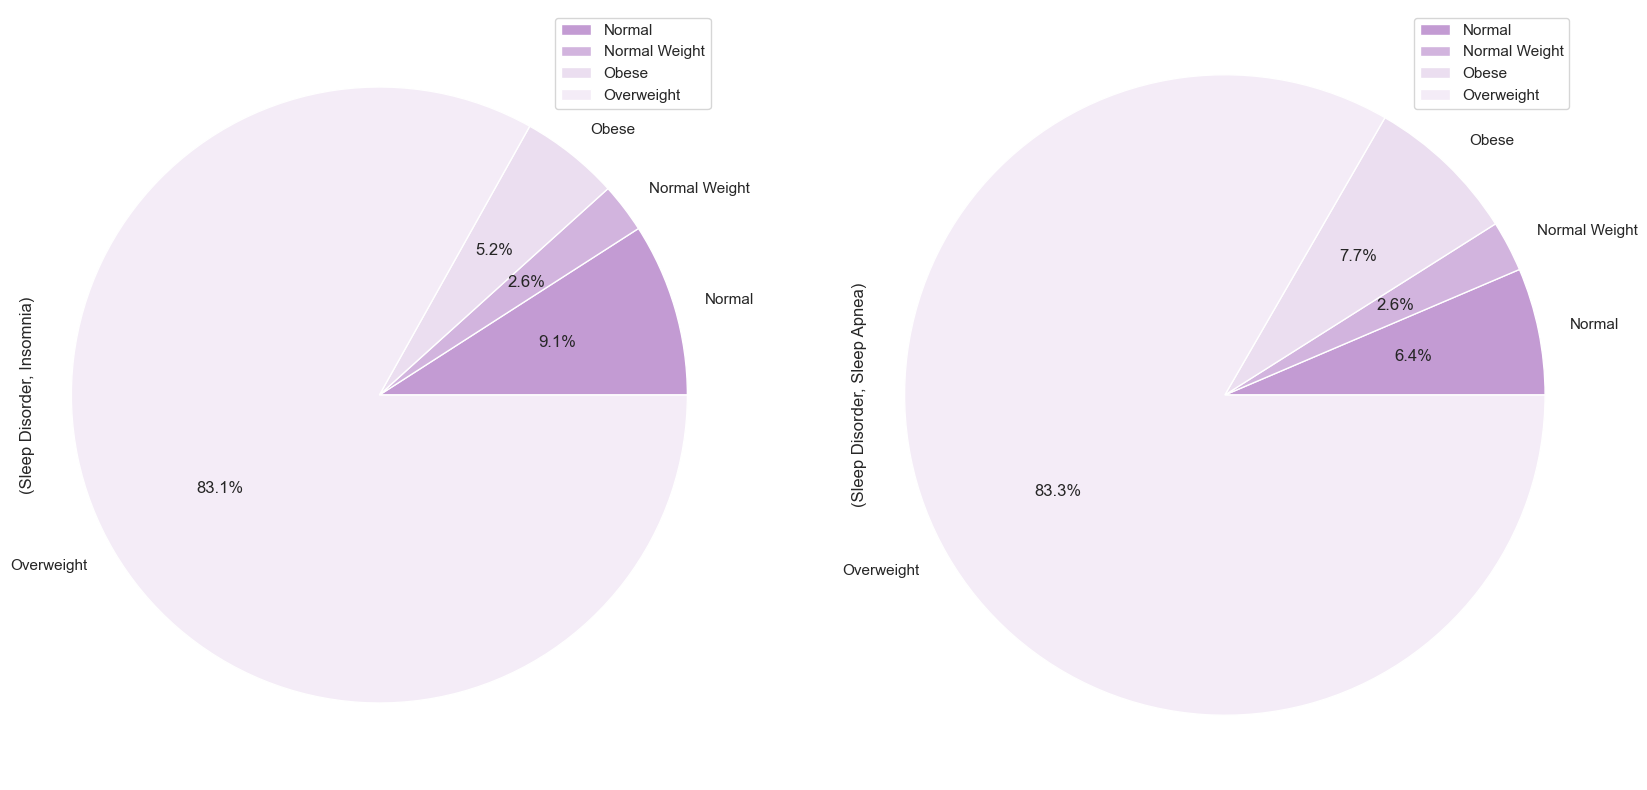

In [36]:
data.pivot_table(index='BMI Category',columns='Sleep Disorder',aggfunc={'Sleep Disorder':'count'}).plot.pie(autopct ='%1.1f%%',
                                                                                                                  subplots=True,figsize=(20,10),
                                                                                                                  colors=['#C39BD3','#D2B4DE','#EBDEF0','#F4ECF7'])

plt.axis('equal')
plt.show()

Bu kod, `sleep_data` veri kümesindeki uyku bozukluklarının (Sleep Disorder) **BMI kategorilerine** göre dağılımını göstermek için **pasta grafik** (pie chart) oluşturuyor. Kodun adım adım açıklaması aşağıdaki gibidir:

1. **`sleep_data.pivot_table(...)`**:
   - **`index='BMI Category'`**: Veriler, BMI kategorilerine göre gruplanıyor.
   - **`columns='Sleep Disorder'`**: Her BMI kategorisi için uyku bozuklukları sütunlar olarak ekleniyor.
   - **`aggfunc={'Sleep Disorder':'count'}`**: Her uyku bozukluğunun sayısını hesaplıyor. Yani, her BMI kategorisinde her uyku bozukluğunun kaç kez görüldüğünü sayıyor.

2. **`.plot.pie(...)`**:
   - **`autopct ='%1.1f%%'`**: Pasta grafiğinde her dilimin yüzdesini gösterir. `%1.1f%%` formatı, yüzdeleri bir ondalıklı basamakla gösterir.
   - **`subplots=True`**: Her sütun için ayrı bir pasta grafiği oluşturur. Bu, her uyku bozukluğu türü için ayrı bir pasta grafiği anlamına gelir.
   - **`figsize=(20,10)`**: Grafiğin boyutlarını (genişlik x yükseklik) ayarlar. Burada grafiğin genişliği 20 birim, yüksekliği ise 10 birim olarak ayarlanmış.
   - **`colors=['#C39BD3','#D2B4DE','#EBDEF0','#F4ECF7']`**: Pasta grafiğindeki dilimler için renk paleti belirler. Her uyku bozukluğu türü farklı bir renk ile gösterilecektir.

3. **`plt.axis('equal')`**:
   - Pasta grafiğinin dairesel olmasını sağlar. Grafik orantılı olarak eşit bir daire şeklinde görüntülenir, aksi halde pasta grafiği eliptik görünebilir.

4. **`plt.show()`**:
   - Grafiklerin ekranda gösterilmesini sağlar.

### Özet:
Kod, `sleep_data` veri kümesindeki BMI kategorilerine göre uyku bozukluklarının dağılımını pasta grafiği ile gösterir. Her uyku bozukluğu türü için ayrı bir pasta grafiği oluşturur ve her dilimin yüzdesini gösterir. Grafiklerin boyutları, renkleri ve şekli ayarlanmıştır.

## Data Preprocessing 🛠️

In [37]:
data.isna().sum()

Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64

In [38]:
data.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [39]:
data["Blood Pressure"].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

Bu açıklama, kan basıncını değerlendirmek için kullanılan standart bir sınıflandırmayı ifade ediyor. Kan basıncı, iki değerle ölçülür: **sistolik** (üst sayı) ve **diyastolik** (alt sayı). İşte açıklamanın detayları:

### 1. **İdeal Kan Basıncı:**
- **Sistolik (Üst Sayı):** 120'nin altında
- **Diyastolik (Alt Sayı):** 80'in altında

Bu aralıkta olan bir kan basıncı ideal kabul edilir. Yani, sistolik basınç 120 mmHg'den ve diyastolik basınç 80 mmHg'den düşükse, bu kan basıncı değerleri genellikle sağlıklı olarak değerlendirilir.

### 2. **Normal Kan Basıncı:**
- **Sistolik (Üst Sayı):** 120 ile 129 arasında
- **Diyastolik (Alt Sayı):** 80 ile 84 arasında

Bu aralıkta olan bir kan basıncı, normal ama biraz yüksek sayılabilir. Bu değerler normal sınırlarda ancak izlenmesi gereken bir durum olabilir.

### 3. **Yüksek Kan Basıncı:**
- Eğer sistolik basınç 130 veya daha yüksekse ya da diyastolik basınç 85 veya daha yüksekse, kan basıncı yüksek olarak kabul edilir.

Bu durumda, kan basıncınız yüksek olarak sınıflandırılır ve genellikle sağlık uzmanı tarafından daha fazla değerlendirme yapılması önerilir. 

### Özet:
- **İdeal:** Sistolik < 120 ve Diyastolik < 80
- **Normal:** Sistolik 120-129 ve Diyastolik 80-84
- **Yüksek:** Sistolik ≥ 130 veya Diyastolik ≥ 85

Kan basıncınızı bu aralıklara göre değerlendirmek, sağlık durumunuzu izlemek için önemlidir. Yüksek kan basıncı, kalp hastalığı ve diğer sağlık sorunları riskini artırabilir.

In [40]:
data['Blood Pressure']=data['Blood Pressure'].apply(lambda x:0 if x in ['120/80','126/83','125/80','128/84','129/84','117/76','118/76','115/75','125/82','122/80'] else 1)
# 0 = normal blood pressure
# 1 = abnormal blood pressure

Bu kodlar, `sleep_data` veri setini işlemek ve makine öğrenmesi modellemesi için uygun hale getirmek amacıyla çeşitli dönüşümler yapıyor. İşte adım adım açıklaması:

### 1. **Kan Basıncını Kategorize Etme**

```python
sleep_data['Blood Pressure'] = sleep_data['Blood Pressure'].apply(
    lambda x: 0 if x in ['120/80', '126/83', '125/80', '128/84', '129/84', '117/76', '118/76', '115/75', '125/82', '122/80'] else 1
)
```
- **Amaç:** Kan basıncını iki kategoriye ayırmak: **normal** (0) ve **anormal** (1).
- **Nasıl:** `apply()` fonksiyonu ve `lambda` fonksiyonu kullanılarak, belirli kan basıncı değerleri **normal** olarak kabul ediliyor ve diğer tüm değerler **anormal** olarak işaretleniyor.

In [41]:
data["Age"]=pd.cut(data["Age"],2)
data["Heart Rate"]=pd.cut(data["Heart Rate"],4)
data["Daily Steps"]=pd.cut(data["Daily Steps"],4)
data["Sleep Duration"]=pd.cut(data["Sleep Duration"],3)
data["Physical Activity Level"]=pd.cut(data["Physical Activity Level"],4)


### 2. **Sürekli Değerleri Kategorilere Ayırma**

```python
sleep_data["Age"] = pd.cut(sleep_data["Age"], 2)
sleep_data["Heart Rate"] = pd.cut(sleep_data["Heart Rate"], 4)
sleep_data["Daily Steps"] = pd.cut(sleep_data["Daily Steps"], 4)
sleep_data["Sleep Duration"] = pd.cut(sleep_data["Sleep Duration"], 3)
sleep_data["Physical Activity Level"] = pd.cut(sleep_data["Physical Activity Level"], 4)
```
- **Amaç:** Sürekli değişkenleri kategorilere ayırarak, bu değişkenleri makine öğrenmesi modellerinde kullanımı daha kolay hale getirmek.
- **Nasıl:** `pd.cut()` fonksiyonu kullanılarak, sürekli değişkenler belirli aralıklara bölünüyor:
  - **Age**: İki kategoriye ayırılıyor (örneğin, genç ve yaşlı).
  - **Heart Rate**, **Daily Steps**, **Physical Activity Level**: Dört kategoriye ayrılıyor.
  - **Sleep Duration**: Üç kategoriye ayrılıyor.



In [42]:
from sklearn.preprocessing import LabelEncoder #for converting non-numeric data (String or Boolean) into numbers

categories=['Gender','Age','Occupation','Sleep Duration','Physical Activity Level','BMI Category','Heart Rate','Daily Steps','Sleep Disorder']
for label in categories:
    data[label]=LabelEncoder().fit_transform(data[label])

### 3. **Kategorik Verileri Sayısal Verilere Çevirme**

```python
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

categories = ['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Physical Activity Level', 'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']
for label in categories:
    sleep_data[label] = LE.fit_transform(sleep_data[label])
```
- **Amaç:** Kategorik verileri makine öğrenmesi algoritmalarında kullanılmak üzere sayısal verilere dönüştürmek.
- **Nasıl:** `LabelEncoder` kullanılarak, her kategorik değişken için sayısal etiketler atanıyor:
  - `LabelEncoder` her benzersiz kategoriyi bir tam sayıya dönüştürür. Örneğin, "Male" ve "Female" değerleri 0 ve 1 olarak kodlanabilir.

### Özet:
- **Kan Basıncı** normal ve anormal olarak iki kategoriye ayrılıyor.
- **Sürekli değişkenler** (yaş, kalp atış hızı, günlük adım sayısı, uyku süresi, fiziksel aktivite seviyesi) kategorilere ayrılıyor.
- **Kategorik veriler** sayısal verilere dönüştürülüyor.

Bu dönüşümler, veri analizini ve makine öğrenmesi modellemeyi kolaylaştırmak için kullanılır, çünkü çoğu makine öğrenmesi algoritması sayısal verilerle çalışır ve sürekli değişkenlerin kategorik hale getirilmesi, verilerin analiz edilmesini veya sınıflandırılmasını kolaylaştırabilir.

In [43]:
data.drop(["Person ID"], axis = 1, inplace = True)

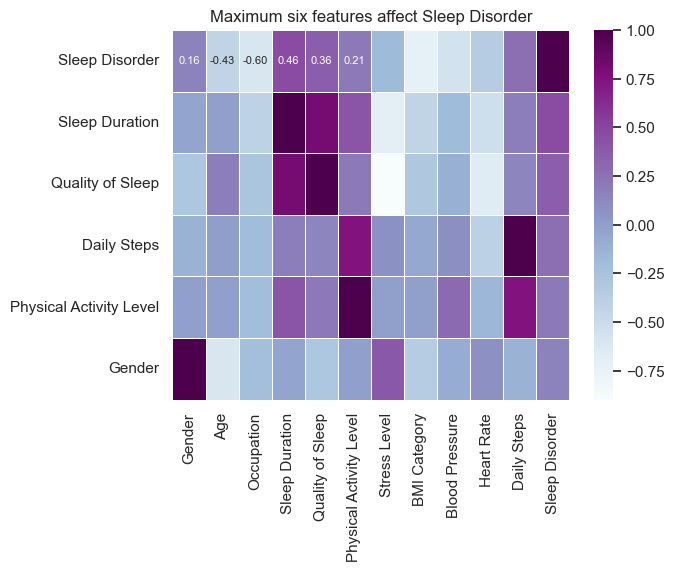

In [44]:
correlation = data.corr()
max_6_corr = correlation.nlargest(6, "Sleep Disorder")
sns.heatmap(max_6_corr, annot = True, fmt = ".2F", annot_kws = {"size" : 8}, linewidths=0.5, cmap = "BuPu")
plt.title('Maximum six features affect Sleep Disorder')
plt.show()

# Data Spliting

In [52]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

x_shape=colored(x.shape, "magenta",None, attrs=["blink"])
y_shape=colored(y.shape, "magenta",None, attrs=["blink"])
print('The dimensions of x is : ',x_shape)
print('The dimensions of y is : ',y_shape)

The dimensions of x is :  (374, 11)
The dimensions of y is :  (374,)


In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=32,shuffle=True)

In [54]:
x_train_shape=colored(x_train.shape, "magenta",None, attrs=["blink"])
x_test_shape=colored(x_test.shape, "magenta",None, attrs=["blink"])
y_train_shape=colored(y_train.shape, "magenta",None, attrs=["blink"])
y_test_shape=colored(y_test.shape, "magenta",None, attrs=["blink"])

print("x train dimensions :",x_train_shape)
print("x test dimensions: ",x_test_shape)
print("y train dimensions :",y_train_shape)
print("y test dimensions :",y_test_shape)

x train dimensions : (250, 11)
x test dimensions:  (124, 11)
y train dimensions : (250,)
y test dimensions : (124,)


# Data modeling

**XGBClassifier Model:-**

In [55]:
from xgboost import XGBClassifier

xgb=XGBClassifier().fit(x_train,y_train)

In [56]:
xgb_training_score=colored(round(xgb.score(x_train,y_train)*100,2), "magenta",None, attrs=["blink"])
xgb_testing_score=colored(round(xgb.score(x_test,y_test)*100,2), "magenta",None, attrs=["blink"])

print("xgb training score :",xgb_training_score)
print("xgb testing score :",xgb_testing_score)

xgb training score : 93.2
xgb testing score : 91.13


Bu kod, XGBoost sınıflandırıcı modelinin eğitim ve test veri kümeleri üzerindeki doğruluk skorlarını hesaplayıp yazdırır. Kodun detaylarını şu şekilde açıklayabiliriz:

### Kodun Açıklaması

1. **Model Skorlarını Hesaplama:**

   ```python
   xgb_training_score = round(xgb.score(x_train, y_train) * 100, 2)
   xgb_testing_score = round(xgb.score(x_test, y_test) * 100, 2)
   ```

   - `xgb.score(x_train, y_train)`: XGBoost modelinin eğitim veri kümesi (`x_train`) ve eğitim etiketleri (`y_train`) üzerindeki doğruluk skorunu hesaplar. Bu, modelin eğitim veri kümesi üzerindeki doğru tahminlerin oranını gösterir.
   - `xgb.score(x_test, y_test)`: XGBoost modelinin test veri kümesi (`x_test`) ve test etiketleri (`y_test`) üzerindeki doğruluk skorunu hesaplar. Bu, modelin test veri kümesi üzerindeki doğru tahminlerin oranını gösterir.
   - `round(..., 2)`: Skorları yüzdelik olarak hesaplar ve sonucu iki ondalık basamağa yuvarlar.

2. **Renk ve Formatlama:**

   ```python
   xgb_training_score = colored(round(xgb.score(x_train, y_train) * 100, 2), "magenta", None, attrs=["blink"])
   xgb_testing_score = colored(round(xgb.score(x_test, y_test) * 100, 2), "magenta", None, attrs=["blink"])
   ```

   - `colored(...)`: `colored` fonksiyonu, metni renkli ve formatlı hale getirmek için kullanılır. Bu fonksiyon, metni belirli bir renkte göstermek için kullanılır. Bu kodda, skorları **"magenta"** rengiyle ve **"blink"** (yanıp sönen) stiliyle göstermek için kullanılmıştır. 
   - `round(..., 2)`: Sonuçları iki ondalık basamağa yuvarlar.

3. **Sonuçları Yazdırma:**

   ```python
   print("xgb training score :", xgb_training_score)
   print("xgb testing score :", xgb_testing_score)
   ```

   - `print(...)`: Hesaplanan ve renklendirilmiş doğruluk skorlarını ekrana yazdırır.

### Özet

Kod, XGBoost modelinin eğitim ve test veri kümeleri üzerindeki doğruluk skorlarını hesaplar, sonuçları yuvarlar ve renkli bir formatla ekrana yazdırır. Bu, modelin eğitim ve test setlerindeki performansını hızlı bir şekilde değerlendirmek için kullanılır.

In [58]:
xgb_pred = xgb.predict(x_test)

In [61]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
print(f"RMSE : {rmse}")

RMSE : 0.4016096644512494


---------------

In [71]:
!pip install shap

   ---------------------------------------- 0.0/456.1 kB ? eta -:--:--
   ------- -------------------------------- 81.9/456.1 kB 2.3 MB/s eta 0:00:01
   ----------------------- ---------------- 266.2/456.1 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 456.1/456.1 kB 2.4 MB/s eta 0:00:00


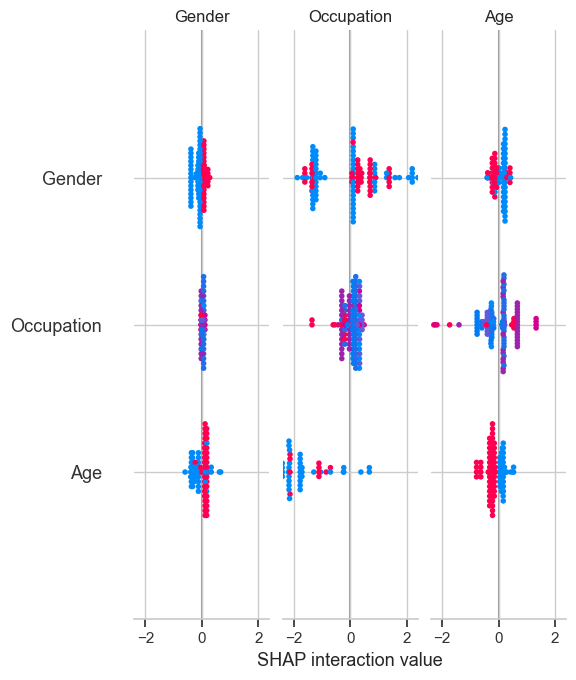

In [72]:
import shap

shap_values = shap.TreeExplainer(xgb).shap_values(x_test)
shap.summary_plot(shap_values, x_test,class_names=['None','Sleep_Apnea','Insomnia'])